In [1]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *

In [2]:
folder = 'sat'
_variables = 160
path = f"./{folder}/sgen1-{folder}-{_variables}-100.cnf"

In [3]:
num_variables, num_clauses, variables, clauses = load_cnf(path)
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)

In [4]:
len(bqm.adj)

352

In [5]:
num_variables

160

# Minor Embedding

1595


<AxesSubplot:ylabel='Count'>

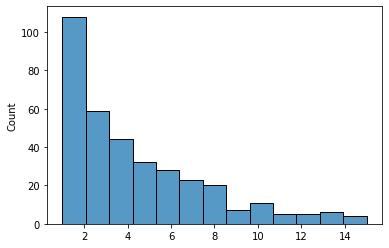

In [14]:
embedding = get_embedding(bqm, 40) #121
print(count_qubits_used(embedding))
sns.histplot(get_chain_lengths(bqm, embedding)[0])

# QPU

In [19]:
sampler =  get_greedy_quantum_sampler(embedding)

### Standard setup

In [22]:
sampleset_standard = sampler.sample(bqm, num_reads=100, answer_mode='raw', chain_strength=4, auto_scale=True)
sampleset_standard.first.energy

21.0

### with annealing offsets

In [23]:
qubit_offsets = get_0_qubits_offsets()
advance_annealing_of_unused(embedding, qubit_offsets)

In [35]:
def get_offset(qpu_offsets, var):
    min_offset = get_min_offset(qpu_offsets, var)
    return min_offset

In [36]:
set_logic_var_annealing_offsets(embedding, qubit_offsets, num_variables, get_offset)

In [38]:
sampleset_offsets = sampler.sample(bqm, num_reads=100, answer_mode='raw', anneal_offsets=qubit_offsets, chain_strength=1.25, auto_scale=True)
sampleset_offsets.first.energy

14.0

### variable redundacy for good embedding

In [39]:
# mirror variables
original_vars_to_mirrors = dict()
mirrors = dict()
num_variables, num_clauses, variables, clauses = load_cnf(path)
initialize_mirror_vars(variables, mirrors, original_vars_to_mirrors)
vars_ = variables.copy()
for var in vars_:
    mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)

vars_ = variables.copy()
for var in vars_:
    mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)
    
vars_ = variables.copy()
for var in vars_:
    mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)

vars_ = variables.copy()
for var in vars_:
    mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)
# for var in variables:
#     mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)

# create bqm
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)

# connect semantically equal variables
for i in range(1, _variables+1):
    update_bqm_single_mirror(bqm, i, mirrors, original_vars_to_mirrors)

In [40]:
len(bqm)

1152

3712


<AxesSubplot:ylabel='Count'>

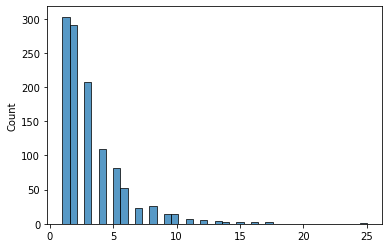

In [42]:
#for i in range(1, 1000):
embedding = get_embedding(bqm, 40)
print(count_qubits_used(embedding))
sns.histplot(get_chain_lengths(bqm, embedding)[0])

In [43]:
sampler =  get_greedy_quantum_sampler(embedding)
temp = sampler.sample(bqm, num_reads=100, answer_mode='raw', chain_strength=1.3, auto_scale=True)
temp.first.energy

54.0